(50000, 32, 32, 3)
(10000, 32, 32, 3)


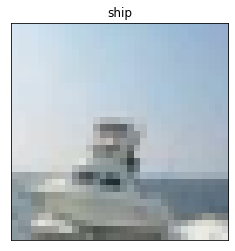

min and max value in image:  30 242


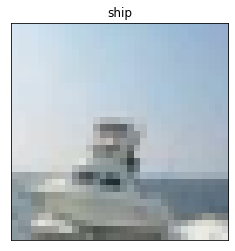

min and max value in image:  0.11764706 0.9490196


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(str(label_names[labels[i]]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

# Add variables to keep track of image size
row = 32
col = 32

# Add a variable for amount of output classes
num_outputs = 10

# Add a variable to keep track of input shape.
input_shape = (row, col, 3)

# Load data in. The dataset is called cifar10.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Load a backup copy of the data.
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data() 

# Set up array for labels:
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

# Code to adjust the label arrays.
train_labels_backup = [item for sublist in train_labels_backup for item in sublist] 
test_labels_backup = [item for sublist in test_labels_backup for item in sublist] 

# Print the shape of the data to make sure it loaded in correctly
print(train_images.shape) 
print(test_images.shape)

# Use plot_image and show_min_max to see the 100th image before you normalize it. 
plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)

# Convert test and train images to float32
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32')

# Divide images by 255 to keep them betweek 0 and 1
train_images /= 255
test_images /= 255

# Convert labels using one-hot encoding. 
train_labels = keras.utils.to_categorical(train_labels, num_outputs)
test_labels = keras.utils.to_categorical(test_labels, num_outputs)

# Use plot_image and show_min_max to make sure the data has been loaded correctly.
plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)

In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

epochs = 15
batch_size = 64
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Dropout(rate = 0.3))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Dropout(rate = 0.3))
model.add(BatchNormalization())

# added next 2
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Dropout(rate = 0.4))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Dropout(rate = 0.4))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units = num_outputs, activation = 'softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size = batch_size, epochs = epochs, 
          validation_data = (test_images, test_labels), shuffle = True)
scores = model.evaluate(test_images, test_labels,verbose=0) 
print('Test accuracy:', scores[1])

model.save('cifar_model.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_14 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 12, 12, 64)       

KeyboardInterrupt: 